In [1]:
#Indian Liver Patient Records

우선 제가 관심있는 분야가 의료분야이고 관련전공이기도해서, 환자 진료기록 데이터를 다루고 싶었습니다

관련데이터들을 쉽게 구하기 어려웠던 점에서, 제가 원했던 방향의 데이터는 찾지 못했지만!

제가 관심있는 분야에서 나름 유명한 데이터를 통해 데이터 eda, 전처리, 모델 적용까지의 프로젝트를 완성하고자 하였습니다!

이 과제에서 사용한 데이터는 Kaggle에서 다운받았으며 환자데이터들 중에서는 유명한 데이터입니다

정확히는 liver disease. 간질환 환자에 대한 여러 수치들을 통해 질병유무를 예측하는 데이터셋 입니다


그래서 저는 데이터에 대한 전처리, EDA를 먼저 진행한 뒤 여러 모델을 사용해보고 적합한 파라미터를 찾아보는 방식으로 진행하였습니다!


### ***
-결측치 제거 등 전처리와 동시에 data관련 EDA를 통해 insight를 얻으려고 했습니다   
-classification을 위한 적합한 모델을 여러개 사용해보려 하였고,   
-적합한 parameter을 찾기위해 grid serach방식을 사용하였습니다   
-scaling, model적용, grid search 사용 은 pipeline을 이용하여 한번에 이루어지도록 해보았습니다

In [1]:
#사용할 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## <데이터 불러오기 + 살펴보기>

In [2]:
df = pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

## <데이터 전처리>

In [7]:
df.isnull().sum() #결측치확인

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
#비어있는 결측치는 중앙값으로 결측치 채움
df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [9]:
df.isnull().sum() #결측치 사라진 거 다시 확인! 이제 결측치 없음

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [10]:
df['Gender']

0      Female
1        Male
2        Male
3        Male
4        Male
        ...  
578      Male
579      Male
580      Male
581      Male
582      Male
Name: Gender, Length: 583, dtype: object

In [11]:
#유일하게 범주형 변수였던 gender변수는 labelencoder을 통해 인코딩을 진행하였습니다

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.Gender.unique())
df['Gender_Encoded'] = le.transform(df.Gender)
df.drop(['Gender'], axis=1, inplace = True)

In [14]:
df['Gender_Encoded'].value_counts()

1    441
0    142
Name: Gender_Encoded, dtype: int64

## < EDA >

간질환으로 진단받은 환자 수 :  416
간질환으로 진단 받지 않은 환자 수:  167


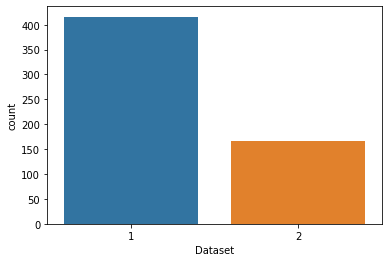

In [16]:
#data 속  타겟변수인 환자 비율 확인

sns.countplot(data=df, x = 'Dataset', label='Count')

yes, no =df['Dataset'].value_counts()
print('간질환으로 진단받은 환자 수 : ',yes)
print('간질환으로 진단 받지 않은 환자 수: ',no)

남자 환자 수 :  441
여자 환자 수 :  142


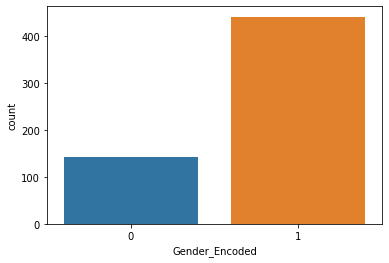

In [20]:
#남녀 비율 확인 
#남자 환자가 훨씬 많음을 확인 할 수 있다
sns.countplot(data=df, x = 'Gender_Encoded', label='Count')

male, female = df['Gender_Encoded'].value_counts()
print('남자 환자 수 : ',male)
print('여자 환자 수 : ',female)

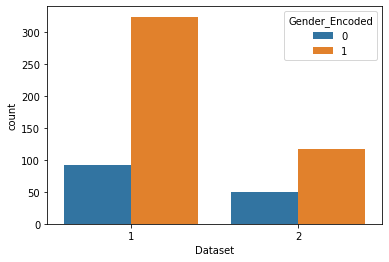

In [22]:
sns.countplot(data=df, x = 'Dataset', hue = 'Gender_Encoded')
#성별과 타겟변수관계를 확인
#데이터자체에 남자가 많은 경향이고, 역시나 타겟변수인 간질환을 진단받은 환자의 성별 역시
#남자가 훨씬 많습니다

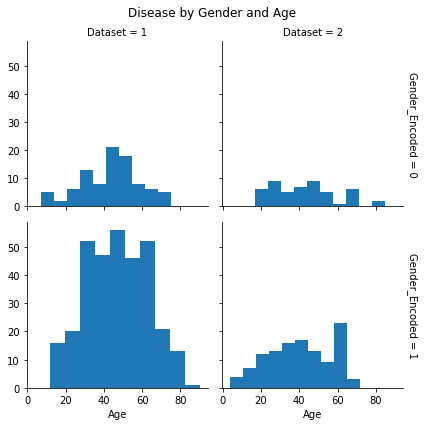

In [23]:
#간질환 진단 받은 환자와 아닌 환자의 나이별 분포 확인
g = sns.FacetGrid(df, col="Dataset", row="Gender_Encoded", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');
#간질환으로 진단받은 환자(dataset=1) 환자의 분포를 나이 분포를 보면 40-60사이에 많이 분포되어있음으로 확인할 수 있음

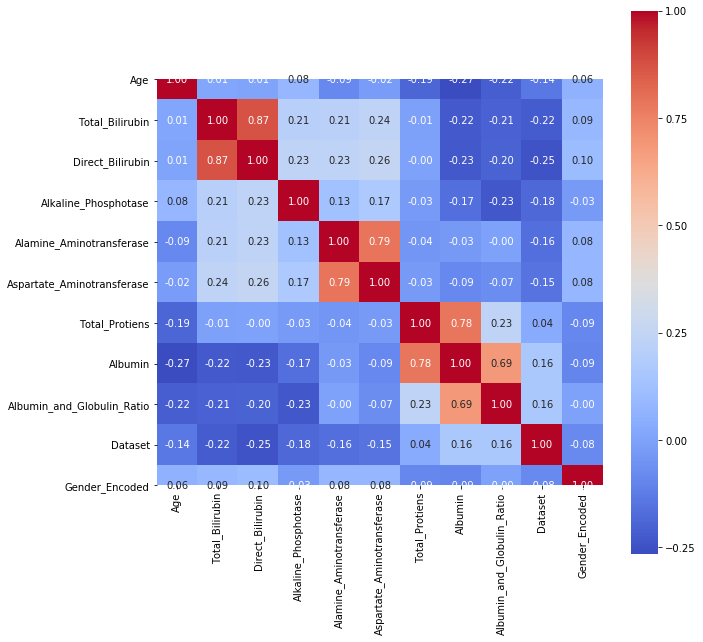

In [24]:
#변수별 상관관계 확인

correlations = df.corr()
#상관계수 구하고 heatmap으로 시각화

plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10},cmap= 'coolwarm')


In [ ]:
#앞서 heatmap에서 상관관계가 높다고 확인된 변수들간의 선형관계를 확인

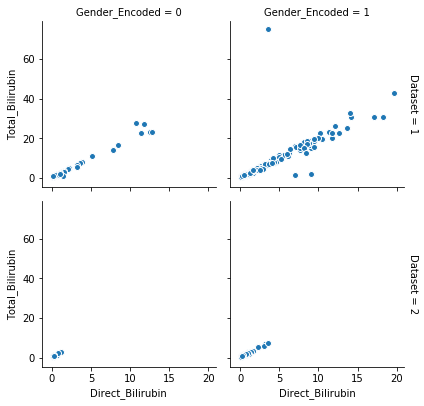

In [25]:
#Total_Bilirubin, Direct_bilirubin
g = sns.FacetGrid(df, col="Gender_Encoded", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)
#이 두 feature은 전체적으로 모두 선형적인 관계를 보임
#두 feature 중 하나는 없애도 될 것으로 판단!

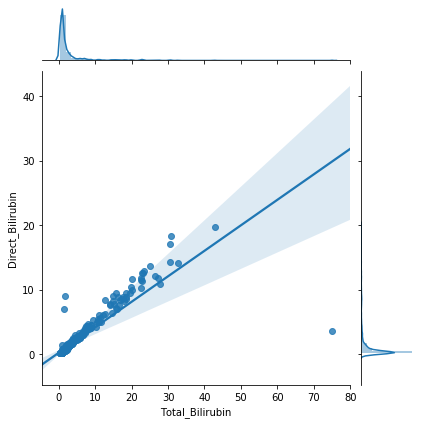

In [26]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

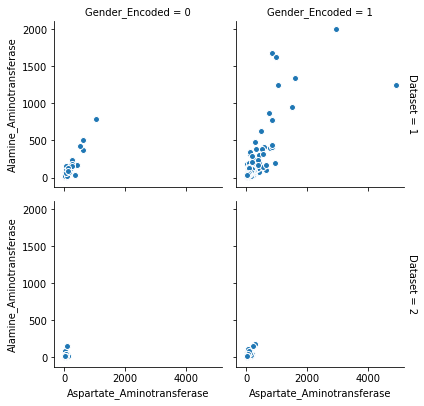

In [27]:
#Aspartate_Aminotransferase & Alamine_Aminotransferase 
g = sns.FacetGrid(df, col="Gender_Encoded", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)
#이 두 feature도 선형적인 관계로 보임
#두 feature 중 하나는 제거해도 괜찮을 것 같다고 판단

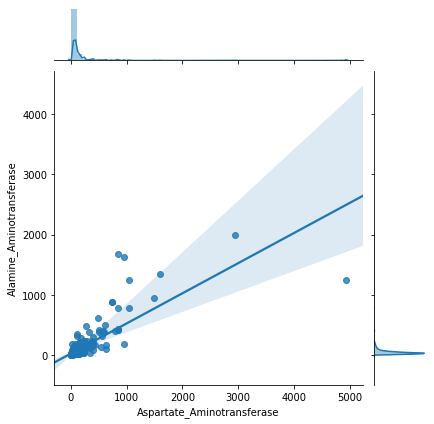

In [28]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

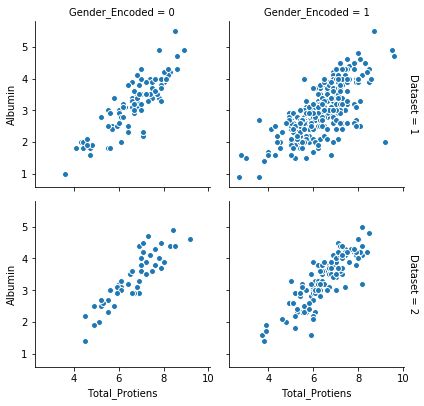

In [29]:
#Total_Protiens & Albumin
g = sns.FacetGrid(df, col="Gender_Encoded", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)
#이 두 feature 역시나 선형적 관계 보임

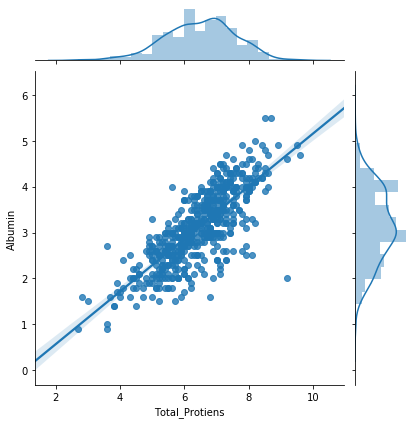

In [30]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

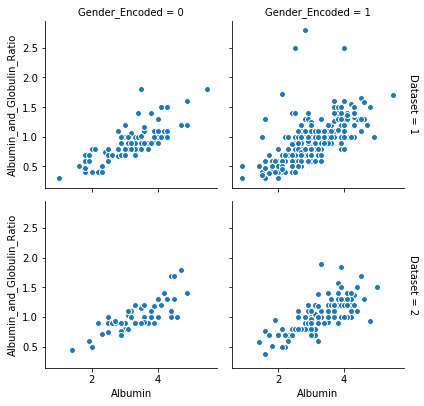

In [31]:
#Albumin, Albumin_and_Globulin_Ratio
g = sns.FacetGrid(df, col="Gender_Encoded", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)
#이 두 feature도 선형적 관게 보임

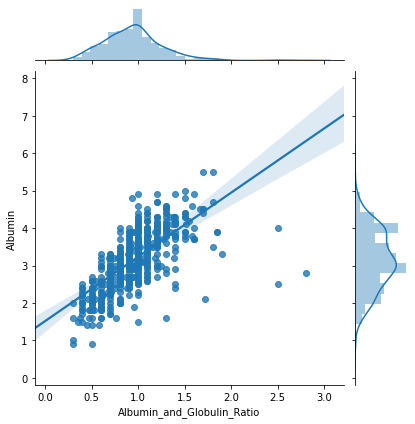

In [32]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

In [36]:
df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Encoded
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


In [12]:
#앞서 얻은 insight를 기반으로 
# Total_Bilirubin, Direct_Bilirubin 중 하나만 사용하기로 결정하였고, 타겟변수인 dataset과 더 상관계수가 작게 나온 direct_Bilirubin을 제외시키는 것으로 판단하였습니다
#또한 Aspartate_Aminotransferase,Alamine_Aminotransferase 중 하나만 사용하기로 결정하였고, 역시나 상관계수가 더 작게 나온 Alamine_Aminotransferase을 제외시켰습니다
#또 다른 feautre를 제거할까 고민했지만, 다른 feature에 비해 타겟변수간와의 상관계수가 높다는 점을 감안하여 최종 feature로 사용하기로 결정하였습니다

X=df[['Age', 'Gender_Encoded',
      'Total_Bilirubin','Alkaline_Phosphotase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=df['Dataset']

## <모델 적용>

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape)

(466, 8) (466,) (117, 8)


In [15]:
#모델은 logistic regression, RandomForest, SVM 세가지를 사용해보았습니다!

In [25]:
# 필요한 모듈 import
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

 

## Logistic Regression

In [26]:
# Pipeline으로 구성하였습니다!
def pipeline_LR(X_train, y_train):
     
    #scaling
    scale = preprocessing.StandardScaler()
     
    # 높은 설명력 기준으로 변수의 수 설정!(앞서 변수를 미리 몇개 제거하기는 했지만 더 적은 변수가 더 높은 accuracy를 보일수도 있다고 판단해서 feature selection을 위한 부분을 넣었습니다)
    selectK = SelectKBest(score_func=f_classif)
     
    #모델 fit
    logistic_model = LogisticRegression()
     
    pipeline_object = Pipeline([('scaler', scale),  #파이프라인을 통해 스케일링
                                ('feature_selection', selectK), # feature 수 선택
                                ('model', logistic_model)]) #모델 선택을 한번에 진행하도록 함!
     
    # Parmeters 튜닝
    params = [{'feature_selection__k': [5,6,7,8],
               'model__C': [0.01, 0.1, 1, 10],
               'model__penalty': ['l1', 'l2']}]
     

    grid_search = GridSearchCV(pipeline_object, param_grid = params, scoring = 'roc_auc', cv=10) #그를 기반으로 그리드서치 한 값을 리턴하도록 함
     
    # Model fit
    grid_search.fit(X_train, y_train)
         
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    return grid_search

In [27]:
model_LR = pipeline_LR(X_train, y_train)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\skle

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\skle

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\skle

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\skle

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\skle

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\user\Anaconda3\lib\site-packages\skle

{'feature_selection__k': 8, 'model__C': 1, 'model__penalty': 'l2'}
0.7333137450784509


In [38]:
scale = preprocessing.StandardScaler()
select_feature = SelectKBest(f_classif, k=8)
model = LogisticRegression()

pp_LR = Pipeline([('scale', scale),
                  ('feature_select', select_feature), 
                  ('LR', model)])

pp_LR.set_params(LR__C = 1).fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('feature_select',
                 SelectKBest(k=8,
                             score_func=<function f_classif at 0x0000026A17BFBC18>)),
                ('LR',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

              precision    recall  f1-score   support

           1       0.76      0.94      0.84        85
           2       0.58      0.22      0.32        32

    accuracy                           0.74       117
   macro avg       0.67      0.58      0.58       117
weighted avg       0.71      0.74      0.70       117

Accuracy: 0.7435897435897436


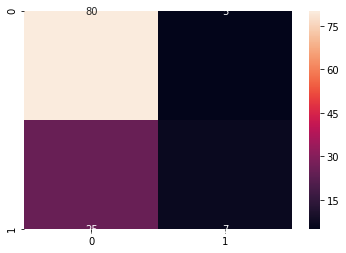

In [39]:
 # 모델을 통해 Testset 예측
preds = pp_LR.predict(X_test)

print(metrics.classification_report(y_test, preds))
print("Accuracy:", metrics.accuracy_score(y_true = y_test, y_pred=preds))

sns.heatmap(confusion_matrix(y_test,preds),annot=True)

#accuracy: 0.74 정도 나오네요!

## RandomForest

In [32]:
# Pipeline 구성 및 모델링

from sklearn.ensemble import RandomForestClassifier


def pipeline_RFC(X_train, y_train):
     
    #scale
    scale = preprocessing.StandardScaler()
     
    # FIXME: 높은 설명력 기준으로 변수의 수 설정
    selectK = SelectKBest(score_func=f_classif)
     
    #모델 fit
    rfc = RandomForestClassifier(random_state=42)
     
    pipeline_object = Pipeline([('scaler', scale), 
                                ('feature_selection', selectK),
                                ('model', rfc)])
     
    # Parmeters 튜닝
    params = [{'feature_selection__k': [5,6,7,8],
               'model__n_estimators': [200, 500],
                'model__max_features': ['auto', 'sqrt', 'log2'],
                'model__max_depth' : [4,5,6,7,8],
                'model__criterion' :['gini', 'entropy'] }]
     

    grid_search = GridSearchCV(pipeline_object, param_grid = params, cv=10)
     
    # Model fit
    grid_search.fit(X_train, y_train)
         
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    return grid_search

In [33]:
model_RFC = pipeline_RFC(X_train, y_train)


{'feature_selection__k': 7, 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__max_features': 'auto', 'model__n_estimators': 500}
0.714708603145236


In [40]:
scale = preprocessing.StandardScaler()
select_feature = SelectKBest(f_classif, k=7)
model = RandomForestClassifier(random_state=42)

pp_rfc = Pipeline([('scale', scale),
                  ('feature_select', select_feature), 
                  ('rfc', model)])

pp_rfc.set_params(rfc__n_estimators = 500, rfc__max_features = 'auto', rfc__max_depth = 4, rfc__criterion = 'entropy').fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('feature_select',
                 SelectKBest(k=7,
                             score_func=<function f_classif at 0x0000026A17BFBC18>)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=4, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                       

              precision    recall  f1-score   support

           1       0.76      0.96      0.85        85
           2       0.67      0.19      0.29        32

    accuracy                           0.75       117
   macro avg       0.71      0.58      0.57       117
weighted avg       0.73      0.75      0.70       117

Accuracy: 0.7521367521367521


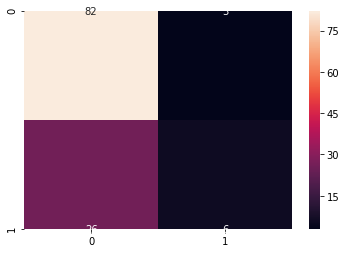

In [41]:
# 모델을 통해 Testset 예측
preds = pp_rfc.predict(X_test)

print(metrics.classification_report(y_test, preds))
print("Accuracy:", metrics.accuracy_score(y_true = y_test, y_pred=preds))
sns.heatmap(confusion_matrix(y_test,preds),annot=True)

#accuracy: 0.75 나오네요!!

## SVM

In [36]:
#SVM

# Pipeline 구성 및 모델링

from sklearn.svm import SVC, LinearSVC

def pipeline_SVC(X_train, y_train):
     
    #scaling
    scale = preprocessing.StandardScaler()
     
    #높은 설명력 기준으로 변수의 수 설정
    selectK = SelectKBest(score_func=f_classif)
     
    #모델 fit
    svc = SVC(class_weight = 'balanced')
     
    pipeline_object = Pipeline([('scaler', scale), 
                                ('feature_selection', selectK),
                                ('model', svc)])
     
    # Parmeters 튜닝
    params = [{'feature_selection__k': [5,6,7,8],
               'model__C'     : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'model__gamma' : ['auto']}]
     

    grid_search = GridSearchCV(pipeline_object, param_grid = params, verbose = 3, cv=10)
     
    # Model fit
    grid_search.fit(X_train, y_train)
         
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    return grid_search

In [37]:
model_SVC = pipeline_SVC(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.277, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=5, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=5, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=5, model__C=0.001, model__gamma=auto .......
[CV]  feature_selection__k=5, model__C=0.001, model__gamma=auto, score=0.277, total=   0.0s
[CV] feature_selection__k=5, model__C=0.001, model__gamma=auto .......
[CV]  feature_selection__k=5, model__C=0.001, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_sele

[CV]  feature_selection__k=5, model__C=100, model__gamma=auto, score=0.574, total=   0.0s
[CV] feature_selection__k=5, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=5, model__C=100, model__gamma=auto, score=0.511, total=   0.0s
[CV] feature_selection__k=5, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=5, model__C=100, model__gamma=auto, score=0.574, total=   0.0s
[CV] feature_selection__k=5, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=5, model__C=100, model__gamma=auto, score=0.511, total=   0.0s
[CV] feature_selection__k=5, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=5, model__C=100, model__gamma=auto, score=0.660, total=   0.0s
[CV] feature_selection__k=5, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=5, model__C=100, model__gamma=auto, score=0.681, total=   0.0s
[CV] feature_selection__k=5, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=5, mode

[CV]  feature_selection__k=6, model__C=0.1, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=6, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=6, model__C=0.1, model__gamma=auto, score=0.532, total=   0.0s
[CV] feature_selection__k=6, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=6, model__C=0.1, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=6, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=6, model__C=0.1, model__gamma=auto, score=0.660, total=   0.0s
[CV] feature_selection__k=6, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=6, model__C=0.1, model__gamma=auto, score=0.543, total=   0.0s
[CV] feature_selection__k=6, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=6, model__C=0.1, model__gamma=auto, score=0.478, total=   0.0s
[CV] feature_selection__k=6, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=6, mode

[CV]  feature_selection__k=7, model__C=0.0001, model__gamma=auto, score=0.702, total=   0.1s
[CV] feature_selection__k=7, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=7, model__C=0.0001, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=7, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=7, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=7, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=7, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=7, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=7, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=7, model__C=0.0001, model__gamma=auto ......
[CV]  feature_selection__k=7, model__C=0.0001, model__gamma=auto, score=0.283, total=   0.0s
[CV] feature_selection__k=7, model__C=0.001, model__gamma=auto .......
[CV]  feature_se

[CV]  feature_selection__k=7, model__C=10, model__gamma=auto, score=0.681, total=   0.0s
[CV] feature_selection__k=7, model__C=10, model__gamma=auto ..........
[CV]  feature_selection__k=7, model__C=10, model__gamma=auto, score=0.522, total=   0.0s
[CV] feature_selection__k=7, model__C=10, model__gamma=auto ..........
[CV]  feature_selection__k=7, model__C=10, model__gamma=auto, score=0.587, total=   0.0s
[CV] feature_selection__k=7, model__C=10, model__gamma=auto ..........
[CV]  feature_selection__k=7, model__C=10, model__gamma=auto, score=0.565, total=   0.0s
[CV] feature_selection__k=7, model__C=10, model__gamma=auto ..........
[CV]  feature_selection__k=7, model__C=10, model__gamma=auto, score=0.587, total=   0.0s
[CV] feature_selection__k=7, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=7, model__C=100, model__gamma=auto, score=0.660, total=   0.1s
[CV] feature_selection__k=7, model__C=100, model__gamma=auto .........
[CV]  feature_selection__k=7, model__C=

[CV]  feature_selection__k=8, model__C=0.1, model__gamma=auto, score=0.553, total=   0.0s
[CV] feature_selection__k=8, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=8, model__C=0.1, model__gamma=auto, score=0.702, total=   0.0s
[CV] feature_selection__k=8, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=8, model__C=0.1, model__gamma=auto, score=0.660, total=   0.0s
[CV] feature_selection__k=8, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=8, model__C=0.1, model__gamma=auto, score=0.587, total=   0.0s
[CV] feature_selection__k=8, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=8, model__C=0.1, model__gamma=auto, score=0.478, total=   0.0s
[CV] feature_selection__k=8, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=8, model__C=0.1, model__gamma=auto, score=0.543, total=   0.0s
[CV] feature_selection__k=8, model__C=0.1, model__gamma=auto .........
[CV]  feature_selection__k=8, mode

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   18.8s finished


In [45]:
scale = preprocessing.StandardScaler()
select_feature = SelectKBest(f_classif, k=8)
model = SVC(class_weight = 'balanced')

pp_svc = Pipeline([('scale', scale),
                  ('feature_select', select_feature), 
                  ('svm', model)])

pp_svc.set_params(svm__C = 100).fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('feature_select',
                 SelectKBest(k=8,
                             score_func=<function f_classif at 0x0000026A17BFBC18>)),
                ('svm',
                 SVC(C=100, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

              precision    recall  f1-score   support

           1       0.85      0.67      0.75        85
           2       0.44      0.69      0.54        32

    accuracy                           0.68       117
   macro avg       0.65      0.68      0.64       117
weighted avg       0.74      0.68      0.69       117

Accuracy: 0.6752136752136753


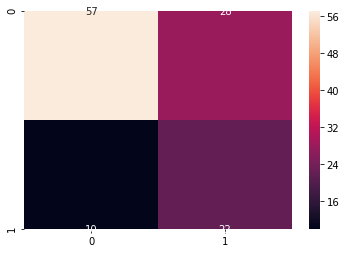

In [47]:
# 모델을 통해 Testset 예측
preds = pp_svc.predict(X_test)

print(metrics.classification_report(y_test, preds))
print("Accuracy:", metrics.accuracy_score(y_true = y_test, y_pred=preds))

sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt="d")
#accuracy 0.67 나오네요

세 모델 비교 결과 random forest가 가장 accuracy가 높게 나왔고
이 데이터를 classification를 하는 가장 좋은 모델은 randomforest로 0.75라는 그렇게 높은 accuracy를 얻진 못했지만 데이터 전처리, eda부터 모델 적용까지 많이 고민해볼수 있었던 과제였던 것 같습니당!